<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/Exploratory_data_Analysis_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 1.   Loading Data from **Github**
## 2.   Data Processing through: **Pandas** and **Numpy**
## 3. Data visualizations: **matplotlib** and **seaborn**

[Partly adapted from ](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)


# Importing libraries

In [1]:
# data processing
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)



---



## Loading Data from **Github**

In [2]:
data_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/automobile/automobile.csv'
df = pd.read_csv(data_url)
df.shape

(11914, 16)

In [3]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
df.head(2).T

,0,1
Make,BMW,BMW
Model,1 Series M,1 Series
Year,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0
Engine Cylinders,6.0,6.0
Transmission Type,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance"


In [5]:
df.tail(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



# Checking the data types

In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# $\color{red}{\text{Careful when you find a column with object data type !!!}}$
Python loads str or mixed data as the $\color{blue}{\text{object}}$ type:

# Exploring unique values & size of your data

In [7]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [8]:
df.Make.nunique()

48



---



# Describing some statistics
$\color{blue}{\text{Numeric data columns only}}$

In [9]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Making the dataframe light-weight by removing some columns

In [10]:
df = df.drop(columns=['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)



---



## Renaming columns

In [11]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## Dealing with duplicate rows

In [12]:
df.shape

(11914, 10)

In [13]:
df[df.duplicated()].shape

(989, 10)

In [14]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000


So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [15]:
df_no_duplcates = df.drop_duplicates()
df.shape, df_no_duplcates.shape

((11914, 10), (10925, 10))

# Dealing with Missing values



---



In [16]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [17]:
df[df.isna().any(axis=1)].shape

(98, 10)

In [18]:
df[~df.isna().any(axis=1)].shape

(11816, 10)

In [19]:
df[df.isna().any(axis=1)].head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
539,FIAT,500e,2015,NaN,0.0,DIRECT_DRIVE,front wheel drive,108,122,31800
540,FIAT,500e,2016,NaN,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
541,FIAT,500e,2017,NaN,0.0,DIRECT_DRIVE,front wheel drive,103,121,31800
1983,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,front wheel drive,110,128,40905
1984,Chevrolet,Bolt EV,2017,200.0,NaN,DIRECT_DRIVE,front wheel drive,110,128,36620


**Column Mean and Mode**

In [20]:
df.HP.mean()

249.38607007176023

In [21]:
df.HP.mode()

0    200.0
Name: HP, dtype: float64

In [22]:
df.Model.mode()

0    Silverado 1500
Name: Model, dtype: object

**Missing value imputations**

Replacing missing/null values with the mode

In [23]:
df.Cylinders.fillna(df.Cylinders.mode()[0], inplace=True)

In [24]:
df.isna().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders        0
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [25]:
df.HP.fillna(df.HP.mode()[0], inplace=True)

In [26]:
df.isna().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

In [27]:
df_dropped_na = df.dropna()
df_dropped_na.shape

(11914, 10)



---



## Box plot (Some clue on Outliers)

<Axes: xlabel='Price'>

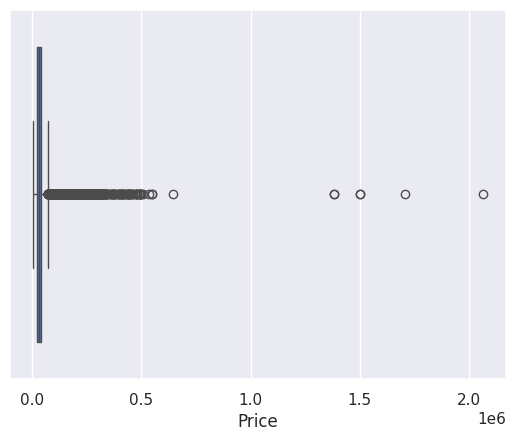

In [28]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='MPG-H'>

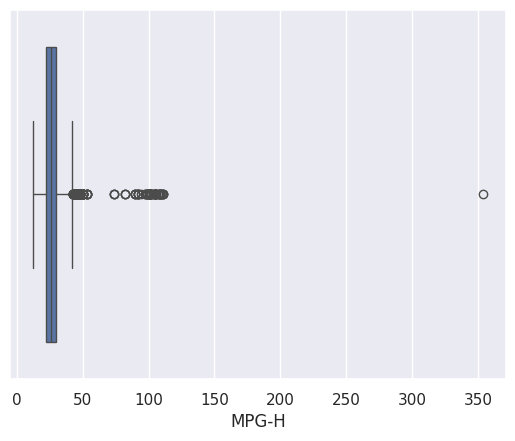

In [29]:
sns.boxplot(x=df['MPG-H'])

<Axes: xlabel='MPG-C'>

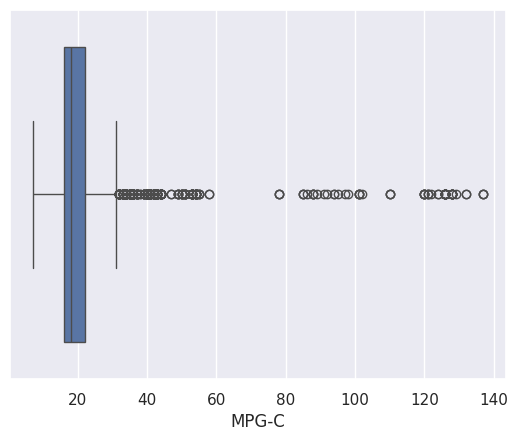

In [30]:
sns.boxplot(x=df['MPG-C'])

<Axes: xlabel='HP'>

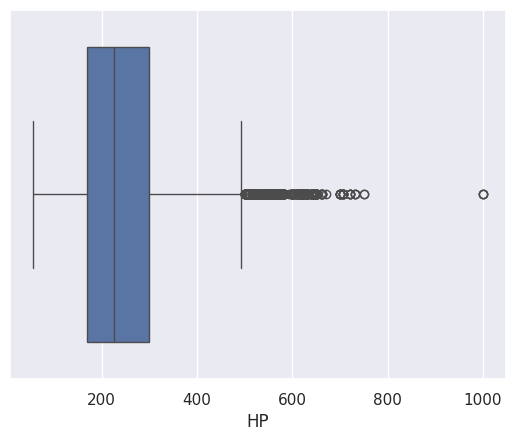

In [31]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

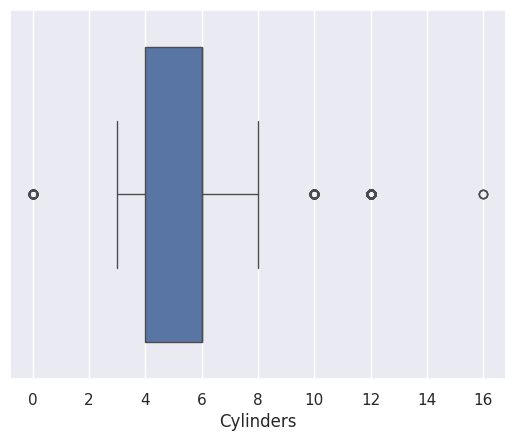

In [32]:
sns.boxplot(x=df['Cylinders'])



---



# Frequency (couunt) plot

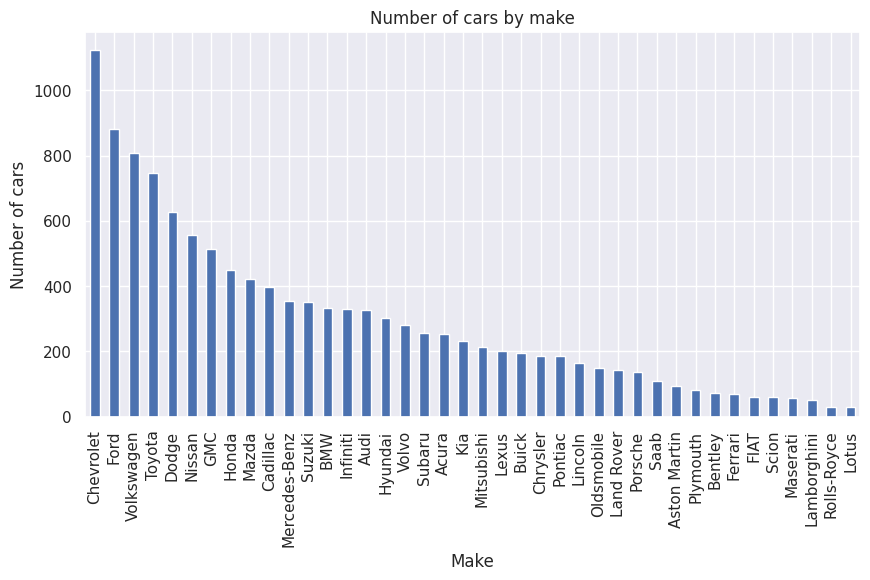

In [33]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

# Heatmap display

,HP,Cylinders,MPG-H,MPG-C,Price
HP,1.000000,0.770188,-0.366710,-0.362922,0.660896
Cylinders,0.770188,1.000000,-0.607422,-0.574382,0.531171
MPG-H,-0.366710,-0.607422,1.000000,0.886829,-0.160043
MPG-C,-0.362922,-0.574382,0.886829,1.000000,-0.157676
Price,0.660896,0.531171,-0.160043,-0.157676,1.000000


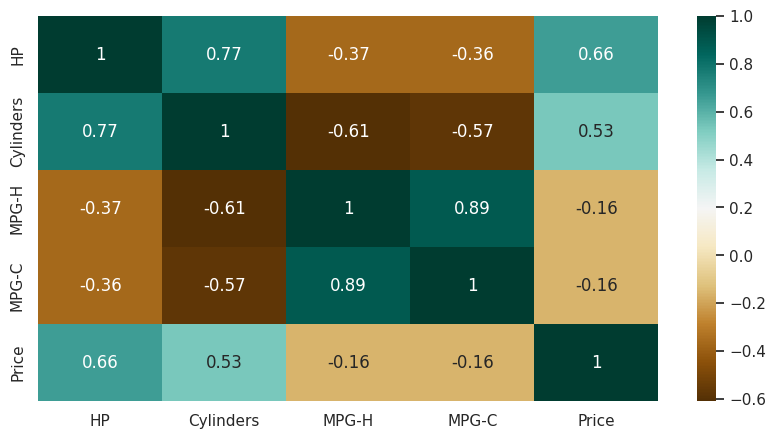

In [34]:
plt.figure(figsize=(10,5))
c = df[['HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Scatterplot

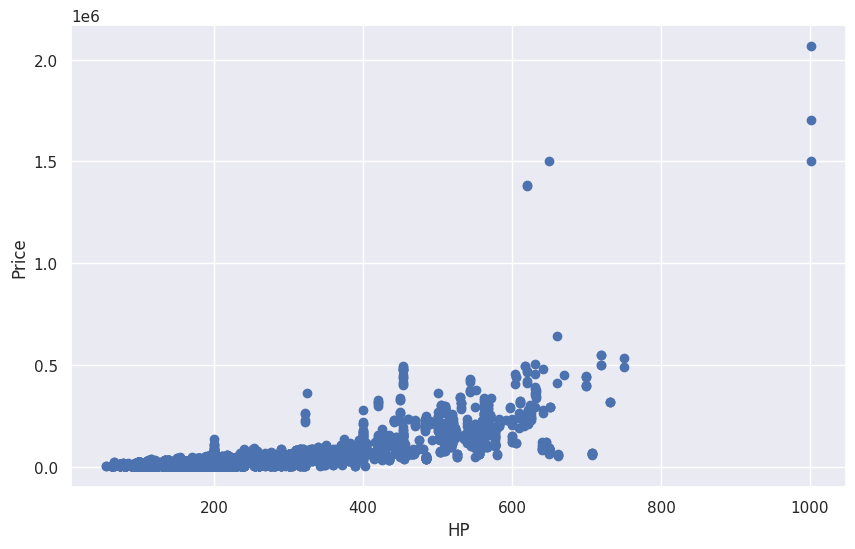

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()